<a href="https://colab.research.google.com/github/marekpinto/AphasiaClassification/blob/main/Aphasia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing things
!pip install ffmpeg moviepy librosa
!pip install pydub
!pip install imbalanced-learn



  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=7cdf3c7977d1121218b1465c8cd25615eb698720e9d6d1550f2c78c7c249bd4f
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /drive/Aphasia


Mounted at /content/drive
[Errno 2] No such file or directory: '/drive/Aphasia'
/content


In [ ]:
#Import control files
%ls
!wget --user= --password= -r -np -nH --cut-dirs=2 -R index.html https://media.talkbank.org/aphasia/English/Control/


Control/
--2021-02-28 23:10:10--  https://media.talkbank.org/aphasia/English/Control/
Resolving media.talkbank.org (media.talkbank.org)... 128.2.27.37
Connecting to media.talkbank.org (media.talkbank.org)|128.2.27.37|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Password protected data"
Reusing existing connection to media.talkbank.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1218 (1.2K) [text/html]
Saving to: ‘Control/index.html.tmp’

Control/index.html. 100%[===================>]   1.19K  --.-KB/s    in 0s      

2021-02-28 23:10:10 (40.3 MB/s) - ‘Control/index.html.tmp’ saved [1218/1218]

Loading robots.txt; please ignore errors.
--2021-02-28 23:10:11--  https://media.talkbank.org/robots.txt
Reusing existing connection to media.talkbank.org:443.
HTTP request sent, awaiting response... 404 Not Found
2021-02-28 23:10:11 ERROR 404: Not Found.

--2021-02-28 23:10:11--  https://media.talkbank.org/aphas

In [ ]:
# Making directories in AphasiaAudio

import os
for dir in os.scandir(r'/content/drive/MyDrive/Aphasia/Aphasia'):
  os.mkdir(os.path.join('/content/drive/MyDrive/Aphasia/AphasiaAudio', dir.name))

In [ ]:
# Making directories in ControlAudio

import os
for dir in os.scandir(r'/content/drive/MyDrive/Aphasia/Control'):
  os.mkdir(os.path.join('/content/drive/MyDrive/Aphasia/ControlAudio', dir.name))

In [ ]:
#Converting video to audio
import os
import moviepy.editor as mp
for subdir, dirs, files in os.walk(r'/content/drive/MyDrive/Aphasia/Aphasia'):
  for filename in files:
      filepath = subdir + os.sep + filename
      if filepath.endswith(".mp4"):
        mp4_file = filepath
        mp3_file = "/content/drive/MyDrive/Aphasia/AphasiaAudio/" + filepath[40:len(filepath)-3] + "mp3"
        video = mp.VideoFileClip(mp4_file)
        video.audio.write_audiofile(mp3_file)
        video.close()

[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside01a.mp3



100%|██████████| 38251/38251 [01:15<00:00, 509.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside03a.mp3



100%|██████████| 34399/34399 [01:19<00:00, 434.77it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside04a.mp3



100%|██████████| 44111/44111 [01:30<00:00, 486.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside02a.mp3



100%|██████████| 60687/60687 [02:08<00:00, 472.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside05a.mp3



100%|██████████| 42665/42665 [01:29<00:00, 478.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside06a.mp3



100%|██████████| 48515/48515 [01:43<00:00, 468.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside07a.mp3



100%|██████████| 45833/45833 [01:40<00:00, 455.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside08a.mp3



100%|██████████| 69847/69847 [02:46<00:00, 418.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside10a.mp3



100%|██████████| 48713/48713 [01:49<00:00, 446.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside09a.mp3



100%|██████████| 61195/61195 [02:20<00:00, 434.83it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside11a.mp3



100%|██████████| 45998/45998 [01:45<00:00, 434.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside12a.mp3



100%|██████████| 48459/48459 [02:09<00:00, 373.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside13a.mp3



100%|██████████| 48768/48768 [02:06<00:00, 385.03it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside15a.mp3



100%|██████████| 67287/67287 [02:59<00:00, 375.41it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside14a.mp3



100%|██████████| 76050/76050 [03:18<00:00, 383.30it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside16a.mp3



100%|██████████| 46737/46737 [02:19<00:00, 334.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside17a.mp3



100%|██████████| 47775/47775 [02:15<00:00, 351.97it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside18a.mp3



100%|██████████| 54449/54449 [02:54<00:00, 312.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside19a.mp3



100%|██████████| 78394/78394 [04:03<00:00, 322.15it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Whiteside/whiteside20a.mp3



100%|██████████| 42601/42601 [04:19<00:00, 164.12it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson02a.mp3



100%|██████████| 45469/45469 [02:20<00:00, 323.76it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson01a.mp3



100%|██████████| 58304/58304 [02:53<00:00, 335.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson04a.mp3



100%|██████████| 55368/55368 [02:56<00:00, 312.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson03a.mp3



100%|██████████| 64787/64787 [03:26<00:00, 314.14it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson05a.mp3



100%|██████████| 37291/37291 [01:54<00:00, 325.73it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson06a.mp3



100%|██████████| 54322/54322 [02:51<00:00, 317.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson09a.mp3



100%|██████████| 58050/58050 [03:13<00:00, 300.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson08a.mp3



100%|██████████| 67883/67883 [03:43<00:00, 303.30it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson07a.mp3



100%|██████████| 94722/94722 [05:12<00:00, 302.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson09b.mp3



100%|██████████| 48592/48592 [02:27<00:00, 328.97it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson10a.mp3



100%|██████████| 34278/34278 [02:05<00:00, 273.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson11a.mp3



100%|██████████| 77738/77738 [04:54<00:00, 263.96it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson12a.mp3



100%|██████████| 51208/51208 [02:46<00:00, 306.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson13a.mp3



100%|██████████| 47974/47974 [02:43<00:00, 293.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson14a.mp3



100%|██████████| 45435/45435 [02:36<00:00, 289.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson14b.mp3



100%|██████████| 41054/41054 [02:15<00:00, 301.87it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson16a.mp3



100%|██████████| 43184/43184 [02:07<00:00, 337.40it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson15a.mp3



100%|██████████| 56758/56758 [03:06<00:00, 304.20it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson17a.mp3



100%|██████████| 44089/44089 [02:15<00:00, 324.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson18a.mp3



100%|██████████| 50578/50578 [02:47<00:00, 301.75it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson21a.mp3



100%|██████████| 44332/44332 [02:20<00:00, 315.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson19a.mp3



100%|██████████| 46826/46826 [02:30<00:00, 310.90it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson23a.mp3



100%|██████████| 33771/33771 [01:45<00:00, 321.05it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson22a.mp3



100%|██████████| 71558/71558 [03:59<00:00, 298.76it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson24a.mp3



100%|██████████| 62994/62994 [03:21<00:00, 312.35it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Williamson/williamson12b.mp3



100%|██████████| 31325/31325 [02:47<00:00, 186.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright203a.mp3



100%|██████████| 48138/48138 [02:38<00:00, 304.63it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright201a.mp3



100%|██████████| 52388/52388 [02:42<00:00, 321.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright202a.mp3



100%|██████████| 47400/47400 [02:38<00:00, 299.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright204a.mp3



100%|██████████| 44387/44387 [02:23<00:00, 308.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright205a.mp3



100%|██████████| 34189/34189 [02:00<00:00, 284.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright207a.mp3



100%|██████████| 46863/46863 [02:32<00:00, 307.84it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Wright/wright206a.mp3



100%|██████████| 63115/63115 [03:21<00:00, 313.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU-bi/tcu02b.mp3



100%|██████████| 63987/63987 [03:43<00:00, 286.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU-bi/tcu10b.mp3



100%|██████████| 54176/54176 [03:09<00:00, 286.19it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU/tcu01a.mp3



100%|██████████| 54496/54496 [03:13<00:00, 282.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU/tcu03a.mp3



100%|██████████| 70962/70962 [04:21<00:00, 271.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU/tcu05a.mp3



100%|██████████| 70862/70862 [04:09<00:00, 284.17it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU/tcu07a.mp3



100%|██████████| 47289/47289 [02:39<00:00, 296.37it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU/tcu09a.mp3



100%|██████████| 41385/41385 [02:34<00:00, 267.55it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TCU/tcu08a.mp3



100%|██████████| 60444/60444 [03:30<00:00, 287.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Thompson/thompson02a.mp3



 78%|███████▊  | 57396/73285 [03:39<00:53, 296.75it/s]


TODO:

    Repetition? 
    Prosody/Fluency
    Look at other features of aphasia, find a way to classify each type
    


 

In [ ]:
import os
import moviepy.editor as mp
from os import path
for subdir, dirs, files in os.walk(r'/content/drive/MyDrive/Aphasia/Aphasia'):
  for filename in files:
      filepath = subdir + os.sep + filename
      if filepath.endswith(".mp4"):
        mp4_file = filepath
        mp3_file = "/content/drive/MyDrive/Aphasia/AphasiaAudio/" + filepath[40:len(filepath)-3] + "mp3"
        if path.exists(mp3_file):
          continue
        else:
          video = mp.VideoFileClip(mp4_file)
          video.audio.write_audiofile(mp3_file)
          video.close()

[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland19a.mp3


100%|██████████| 30471/30471 [00:41<00:00, 730.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland21a.mp3


100%|██████████| 24255/24255 [00:29<00:00, 822.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland19e.mp3


100%|██████████| 52486/52486 [01:04<00:00, 812.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland21b.mp3


100%|██████████| 14998/14998 [00:18<00:00, 810.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland22a.mp3


100%|██████████| 16741/16741 [00:20<00:00, 798.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland21c.mp3


100%|██████████| 21684/21684 [00:26<00:00, 810.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland21d.mp3


100%|██████████| 27104/27104 [00:33<00:00, 802.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland22b.mp3


100%|██████████| 13716/13716 [00:16<00:00, 824.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland22c.mp3


100%|██████████| 16222/16222 [00:19<00:00, 814.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland22e.mp3


100%|██████████| 17200/17200 [00:20<00:00, 833.74it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland22d.mp3


100%|██████████| 26243/26243 [00:31<00:00, 830.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland23c.mp3


100%|██████████| 28913/28913 [00:35<00:00, 814.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland23b.mp3


100%|██████████| 35579/35579 [00:44<00:00, 797.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland23d.mp3


100%|██████████| 39684/39684 [00:52<00:00, 756.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland23a.mp3


100%|██████████| 83762/83762 [01:48<00:00, 768.95it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland24a.mp3


100%|██████████| 13286/13286 [00:16<00:00, 796.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland24b.mp3


100%|██████████| 14268/14268 [00:17<00:00, 803.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland24c.mp3


100%|██████████| 10140/10140 [00:13<00:00, 764.33it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland24d.mp3


100%|██████████| 15436/15436 [00:19<00:00, 804.67it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland25a.mp3


100%|██████████| 27159/27159 [00:34<00:00, 791.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland25b.mp3


100%|██████████| 25768/25768 [00:32<00:00, 792.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland25c.mp3


100%|██████████| 23880/23880 [00:30<00:00, 777.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland25d.mp3


100%|██████████| 39683/39683 [00:48<00:00, 821.64it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland26a.mp3


100%|██████████| 23351/23351 [00:29<00:00, 803.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland26b.mp3


100%|██████████| 15869/15869 [00:20<00:00, 785.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland26c.mp3


100%|██████████| 16979/16979 [00:20<00:00, 809.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland26d.mp3


100%|██████████| 39683/39683 [00:48<00:00, 821.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland27b.mp3


100%|██████████| 26662/26662 [00:32<00:00, 812.01it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland27a.mp3


100%|██████████| 79369/79369 [01:41<00:00, 781.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland27d.mp3


100%|██████████| 21169/21169 [00:26<00:00, 784.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland27c.mp3


100%|██████████| 74150/74150 [01:32<00:00, 805.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland28a.mp3


100%|██████████| 58391/58391 [01:13<00:00, 798.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland28b.mp3


100%|██████████| 39683/39683 [00:50<00:00, 784.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland28d.mp3


100%|██████████| 13173/13173 [00:18<00:00, 714.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland28c.mp3


100%|██████████| 53126/53126 [01:06<00:00, 799.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland29a.mp3


100%|██████████| 55048/55048 [01:09<00:00, 789.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland29b.mp3


100%|██████████| 53125/53125 [01:07<00:00, 790.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland29d.mp3


100%|██████████| 17530/17530 [00:21<00:00, 812.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland29c.mp3


100%|██████████| 53125/53125 [01:10<00:00, 749.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland23e.mp3


100%|██████████| 24256/24256 [00:30<00:00, 802.03it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland20a.mp3


100%|██████████| 54508/54508 [01:21<00:00, 668.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland21e.mp3


100%|██████████| 26461/26461 [00:33<00:00, 779.35it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland24e.mp3


100%|██████████| 11907/11907 [00:14<00:00, 817.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland25e.mp3


100%|██████████| 15877/15877 [00:20<00:00, 777.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland29e.mp3


100%|██████████| 31091/31091 [00:39<00:00, 786.07it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland26e.mp3


100%|██████████| 15877/15877 [00:19<00:00, 807.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland27e.mp3


100%|██████████| 27123/27123 [00:34<00:00, 790.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland01b.mp3


100%|██████████| 46178/46178 [01:53<00:00, 407.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland02a.mp3


100%|██████████| 27606/27606 [02:08<00:00, 215.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland02b.mp3


100%|██████████| 26646/26646 [01:48<00:00, 246.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kurland/kurland03a.mp3


100%|██████████| 30958/30958 [02:17<00:00, 224.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas02a.mp3


100%|██████████| 34939/34939 [00:55<00:00, 624.41it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas03a.mp3


100%|██████████| 36684/36684 [01:00<00:00, 607.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas01a.mp3


100%|██████████| 47034/47034 [01:18<00:00, 597.15it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas04a.mp3


100%|██████████| 47709/47709 [01:21<00:00, 588.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas05a.mp3


100%|██████████| 29665/29665 [00:49<00:00, 593.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas06a.mp3


100%|██████████| 36927/36927 [01:01<00:00, 595.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas08a.mp3


100%|██████████| 32127/32127 [00:47<00:00, 683.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas07a.mp3


100%|██████████| 40547/40547 [00:52<00:00, 779.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas10a.mp3


100%|██████████| 92461/92461 [01:53<00:00, 812.32it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas09a.mp3


100%|██████████| 91512/91512 [02:29<00:00, 613.18it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas12a.mp3


100%|██████████| 72254/72254 [01:27<00:00, 829.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas11a.mp3


100%|██████████| 101189/101189 [02:02<00:00, 825.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas13a.mp3


100%|██████████| 69462/69462 [01:33<00:00, 742.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas15a.mp3


100%|██████████| 65268/65268 [01:53<00:00, 572.82it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas14a.mp3


100%|██████████| 74384/74384 [02:08<00:00, 577.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas16a.mp3


100%|██████████| 77905/77905 [01:36<00:00, 806.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas17a.mp3


100%|██████████| 50887/50887 [01:03<00:00, 795.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas18a.mp3


100%|██████████| 41077/41077 [00:52<00:00, 789.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas19a.mp3


100%|██████████| 58254/58254 [01:15<00:00, 775.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas20a.mp3


100%|██████████| 65803/65803 [01:30<00:00, 724.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas21a.mp3


100%|██████████| 58569/58569 [01:15<00:00, 778.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas22a.mp3


100%|██████████| 62107/62107 [01:48<00:00, 569.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kansas/kansas23a.mp3


100%|██████████| 45575/45575 [01:23<00:00, 546.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/STAR/star03a.mp3


100%|██████████| 59352/59352 [01:38<00:00, 604.36it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale03a.mp3


100%|██████████| 33462/33462 [00:59<00:00, 560.06it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale01a.mp3


100%|██████████| 47504/47504 [01:33<00:00, 506.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale02a.mp3


100%|██████████| 61648/61648 [01:55<00:00, 531.64it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale02b.mp3


100%|██████████| 80829/80829 [02:14<00:00, 600.01it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale05a.mp3


100%|██████████| 50339/50339 [01:30<00:00, 556.84it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale04a.mp3


100%|██████████| 73113/73113 [02:12<00:00, 549.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale05b.mp3


100%|██████████| 45082/45082 [01:16<00:00, 587.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale05c.mp3


100%|██████████| 43901/43901 [01:21<00:00, 541.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale06a.mp3


100%|██████████| 53194/53194 [01:36<00:00, 552.78it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale06b.mp3


100%|██████████| 41661/41661 [01:12<00:00, 574.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale06c.mp3


100%|██████████| 51284/51284 [01:25<00:00, 601.89it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale07a.mp3


100%|██████████| 53372/53372 [01:33<00:00, 569.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale08a.mp3


100%|██████████| 59255/59255 [01:43<00:00, 574.75it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale10a.mp3


100%|██████████| 43449/43449 [01:15<00:00, 577.29it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale11a.mp3


100%|██████████| 58574/58574 [01:49<00:00, 533.12it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale11b.mp3


100%|██████████| 51284/51284 [01:29<00:00, 575.94it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale12b.mp3


100%|██████████| 23297/23297 [00:41<00:00, 560.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale12a.mp3


100%|██████████| 63216/63216 [01:52<00:00, 563.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale14a.mp3


100%|██████████| 45615/45615 [01:20<00:00, 566.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale12c.mp3


100%|██████████| 46793/46793 [01:15<00:00, 617.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale14c.mp3


100%|██████████| 42742/42742 [01:10<00:00, 607.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale13a.mp3


100%|██████████| 78875/78875 [02:24<00:00, 546.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale15a.mp3


100%|██████████| 39509/39509 [01:09<00:00, 569.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale15b.mp3


100%|██████████| 37280/37280 [01:06<00:00, 558.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale15c.mp3


100%|██████████| 35161/35161 [00:58<00:00, 603.57it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale16a.mp3


100%|██████████| 67649/67649 [02:13<00:00, 504.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale17a.mp3


100%|██████████| 74384/74384 [02:10<00:00, 571.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale18a.mp3


100%|██████████| 73830/73830 [02:14<00:00, 549.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale18b.mp3


100%|██████████| 54938/54938 [01:36<00:00, 566.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale19a.mp3


100%|██████████| 47838/47838 [01:24<00:00, 565.85it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale21a.mp3


100%|██████████| 48989/48989 [01:25<00:00, 573.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale18c.mp3


100%|██████████| 61460/61460 [01:41<00:00, 606.01it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale20a.mp3


100%|██████████| 51225/51225 [01:29<00:00, 574.18it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale24a.mp3


100%|██████████| 25975/25975 [00:42<00:00, 604.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale22a.mp3


100%|██████████| 49110/49110 [01:31<00:00, 536.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale23a.mp3


100%|██████████| 48749/48749 [01:22<00:00, 589.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale25a.mp3


100%|██████████| 43659/43659 [01:14<00:00, 588.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale26a.mp3


100%|██████████| 57288/57288 [01:36<00:00, 595.21it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale27a.mp3


100%|██████████| 54419/54419 [01:29<00:00, 609.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale28a.mp3


100%|██████████| 38615/38615 [01:04<00:00, 598.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale30a.mp3


100%|██████████| 76182/76182 [02:06<00:00, 604.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale12d.mp3


100%|██████████| 48472/48472 [01:28<00:00, 545.19it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale06d.mp3


100%|██████████| 56683/56683 [01:36<00:00, 587.98it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale18d.mp3


100%|██████████| 57488/57488 [01:35<00:00, 601.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale17c.mp3


100%|██████████| 82309/82309 [02:17<00:00, 599.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale30b.mp3


100%|██████████| 59574/59574 [01:38<00:00, 603.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale32a.mp3


100%|██████████| 55568/55568 [01:34<00:00, 590.89it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale33a.mp3


100%|██████████| 61616/61616 [01:44<00:00, 588.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale34a.mp3


100%|██████████| 74362/74362 [02:05<00:00, 592.50it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale36a.mp3


100%|██████████| 50447/50447 [01:24<00:00, 596.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale38a.mp3


100%|██████████| 49223/49223 [01:22<00:00, 597.13it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale35a.mp3


100%|██████████| 62620/62620 [01:46<00:00, 588.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale09a.mp3


100%|██████████| 43239/43239 [01:16<00:00, 564.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale15d.mp3


100%|██████████| 41564/41564 [01:25<00:00, 483.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/SCALE/scale31a.mp3


100%|██████████| 61230/61230 [01:46<00:00, 574.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kempler/kempler02a.mp3


100%|██████████| 66976/66976 [05:34<00:00, 200.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kempler/kempler03a.mp3


100%|██████████| 85325/85325 [02:34<00:00, 551.11it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Kempler/kempler04a.mp3


100%|██████████| 60839/60839 [01:47<00:00, 567.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Garrett/garrett02a.mp3


100%|██████████| 29287/29287 [00:52<00:00, 560.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Garrett/garrett01a.mp3


100%|██████████| 72037/72037 [02:09<00:00, 555.36it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap03a.mp3


100%|██████████| 29014/29014 [00:50<00:00, 578.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap04a.mp3


100%|██████████| 32126/32126 [00:55<00:00, 574.66it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap01a.mp3


100%|██████████| 39249/39249 [01:02<00:00, 624.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap06a.mp3


100%|██████████| 30338/30338 [00:53<00:00, 570.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap05a.mp3


100%|██████████| 57507/57507 [01:46<00:00, 537.82it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap08a.mp3


100%|██████████| 49861/49861 [01:29<00:00, 559.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap07a.mp3


100%|██████████| 64266/64266 [01:54<00:00, 560.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap09a.mp3


100%|██████████| 57772/57772 [01:56<00:00, 495.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap10a.mp3


100%|██████████| 41015/41015 [01:14<00:00, 551.56it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap11a.mp3


100%|██████████| 40507/40507 [01:11<00:00, 563.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap12a.mp3


100%|██████████| 41241/41241 [01:19<00:00, 515.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap13a.mp3


100%|██████████| 44987/44987 [01:18<00:00, 570.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap14a.mp3


100%|██████████| 50026/50026 [01:29<00:00, 559.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap16a.mp3


100%|██████████| 43780/43780 [01:18<00:00, 556.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap15a.mp3


100%|██████████| 52523/52523 [01:34<00:00, 555.71it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap17a.mp3


100%|██████████| 39421/39421 [01:10<00:00, 561.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap18a.mp3


100%|██████████| 58028/58028 [01:44<00:00, 556.66it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap19a.mp3


100%|██████████| 71156/71156 [02:12<00:00, 537.43it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/TAP/tap02a.mp3


100%|██████████| 53071/53071 [01:32<00:00, 573.07it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman01b.mp3


100%|██████████| 49574/49574 [01:20<00:00, 618.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman01a.mp3


100%|██████████| 60774/60774 [01:46<00:00, 569.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman02a.mp3


100%|██████████| 72219/72219 [02:07<00:00, 565.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman03a.mp3


100%|██████████| 69493/69493 [02:10<00:00, 532.14it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman04a.mp3


100%|██████████| 37885/37885 [01:07<00:00, 560.65it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman05a.mp3


100%|██████████| 53005/53005 [01:32<00:00, 574.57it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman06a.mp3


100%|██████████| 48955/48955 [01:25<00:00, 571.01it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman07a.mp3


100%|██████████| 59207/59207 [01:42<00:00, 577.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman08a.mp3


100%|██████████| 47807/47807 [01:20<00:00, 596.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman09a.mp3


100%|██████████| 49452/49452 [01:23<00:00, 588.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman10a.mp3


100%|██████████| 53082/53082 [01:38<00:00, 539.17it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman11a.mp3


100%|██████████| 53259/53259 [01:37<00:00, 547.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman11b.mp3


100%|██████████| 62475/62475 [01:43<00:00, 605.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman13a.mp3


100%|██████████| 51846/51846 [01:30<00:00, 575.73it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman12a.mp3


100%|██████████| 72837/72837 [02:06<00:00, 577.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman14a.mp3


100%|██████████| 58986/58986 [01:41<00:00, 582.41it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Elman/elman15a.mp3


100%|██████████| 55214/55214 [01:45<00:00, 524.86it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU01b.mp3


100%|██████████| 6555/6555 [00:10<00:00, 610.60it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU01a.mp3


100%|██████████| 18882/18882 [00:30<00:00, 625.26it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU02a.mp3


100%|██████████| 17371/17371 [00:29<00:00, 591.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU02b.mp3


100%|██████████| 16742/16742 [00:27<00:00, 614.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU03a.mp3


100%|██████████| 27678/27678 [00:45<00:00, 612.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU03b.mp3


100%|██████████| 23738/23738 [00:37<00:00, 635.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU04a.mp3


100%|██████████| 32214/32214 [00:58<00:00, 548.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU05a.mp3


100%|██████████| 24457/24457 [00:36<00:00, 663.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU05b.mp3


100%|██████████| 23683/23683 [00:37<00:00, 629.81it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU07a.mp3


100%|██████████| 25350/25350 [00:40<00:00, 630.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU06b.mp3


100%|██████████| 34476/34476 [00:54<00:00, 633.86it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU07b.mp3


100%|██████████| 22789/22789 [00:36<00:00, 628.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU06a.mp3


100%|██████████| 62045/62045 [01:46<00:00, 583.96it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU08a.mp3


100%|██████████| 27458/27458 [00:45<00:00, 597.35it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU08b.mp3


100%|██████████| 28727/28727 [00:47<00:00, 603.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/MSU/MSU04b.mp3


100%|██████████| 32831/32831 [00:51<00:00, 639.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson04a.mp3


100%|██████████| 40128/40128 [01:15<00:00, 528.39it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson03a.mp3


100%|██████████| 50766/50766 [01:32<00:00, 546.60it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson05a.mp3


100%|██████████| 54121/54121 [01:46<00:00, 507.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson06a.mp3


100%|██████████| 55390/55390 [01:42<00:00, 539.98it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson07a.mp3


100%|██████████| 50247/50247 [01:42<00:00, 489.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson09a.mp3


100%|██████████| 53459/53459 [01:39<00:00, 539.01it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson10a.mp3


100%|██████████| 51174/51174 [01:34<00:00, 539.81it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson11a.mp3


100%|██████████| 45051/45051 [01:22<00:00, 547.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson12a.mp3


100%|██████████| 34598/34598 [01:05<00:00, 530.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson13a.mp3


100%|██████████| 53386/53386 [01:40<00:00, 529.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson01a.mp3


100%|██████████| 28163/28163 [02:32<00:00, 184.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson10b.mp3


100%|██████████| 32081/32081 [02:26<00:00, 218.92it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson06b.mp3


100%|██████████| 31772/31772 [02:07<00:00, 249.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson02a.mp3


100%|██████████| 49396/49396 [04:50<00:00, 170.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson03b.mp3


100%|██████████| 30602/30602 [02:55<00:00, 174.52it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson08b.mp3


100%|██████████| 12277/12277 [01:13<00:00, 167.84it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Fridriksson/fridriksson09b.mp3


100%|██████████| 53634/53634 [05:07<00:00, 174.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU06a.mp3


100%|██████████| 40109/40109 [01:14<00:00, 535.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU07a.mp3


100%|██████████| 62732/62732 [01:47<00:00, 581.51it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU08a.mp3


100%|██████████| 51156/51156 [01:33<00:00, 548.05it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU09a.mp3


100%|██████████| 75655/75655 [02:17<00:00, 549.20it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU10a.mp3


100%|██████████| 105399/105399 [03:02<00:00, 577.69it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU11a.mp3


100%|██████████| 82538/82538 [02:41<00:00, 512.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU12a.mp3


100%|██████████| 68713/68713 [02:04<00:00, 553.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU03a.mp3


100%|██████████| 26047/26047 [00:37<00:00, 690.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU02a.mp3


100%|██████████| 50715/50715 [01:12<00:00, 699.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU04a.mp3


100%|██████████| 58474/58474 [01:22<00:00, 709.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU01a.mp3


100%|██████████| 87262/87262 [01:56<00:00, 751.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/BU/BU05a.mp3


100%|██████████| 60499/60499 [01:48<00:00, 559.61it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler04a.mp3


100%|██████████| 67560/67560 [02:01<00:00, 557.55it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler03a.mp3


100%|██████████| 70982/70982 [02:06<00:00, 560.12it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler01a.mp3


100%|██████████| 83130/83130 [02:22<00:00, 581.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler05a.mp3


100%|██████████| 32978/32978 [00:54<00:00, 603.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler07a.mp3


100%|██████████| 22875/22875 [00:40<00:00, 568.74it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler06a.mp3


100%|██████████| 27520/27520 [00:46<00:00, 587.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler02a.mp3


100%|██████████| 101712/101712 [03:07<00:00, 542.05it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler11a.mp3


100%|██████████| 36462/36462 [01:07<00:00, 541.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler10a.mp3


100%|██████████| 45624/45624 [01:24<00:00, 540.96it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler08a.mp3


100%|██████████| 78286/78286 [02:22<00:00, 551.08it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler12a.mp3


100%|██████████| 48163/48163 [01:27<00:00, 552.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler09a.mp3


100%|██████████| 89463/89463 [02:51<00:00, 521.00it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler13a.mp3


100%|██████████| 65056/65056 [01:58<00:00, 549.58it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler14a.mp3


100%|██████████| 54492/54492 [01:49<00:00, 497.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler15a.mp3


100%|██████████| 58988/58988 [01:47<00:00, 550.45it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler16a.mp3


100%|██████████| 44206/44206 [01:17<00:00, 569.83it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler18a.mp3


100%|██████████| 39470/39470 [01:10<00:00, 557.38it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler19a.mp3


100%|██████████| 19777/19777 [00:37<00:00, 521.92it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler20a.mp3


100%|██████████| 41871/41871 [01:12<00:00, 579.79it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler17a.mp3


100%|██████████| 89594/89594 [02:41<00:00, 553.19it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler22a.mp3


100%|██████████| 38247/38247 [01:05<00:00, 587.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler21a.mp3


100%|██████████| 66042/66042 [01:52<00:00, 585.36it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler24a.mp3


100%|██████████| 34300/34300 [00:57<00:00, 595.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler23a.mp3


100%|██████████| 52167/52167 [01:31<00:00, 568.62it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/Adler/adler25a.mp3


100%|██████████| 92019/92019 [02:41<00:00, 569.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT01a.mp3


100%|██████████| 42357/42357 [01:14<00:00, 569.83it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT02a.mp3


100%|██████████| 57023/57023 [01:39<00:00, 571.32it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT04a.mp3


100%|██████████| 31420/31420 [00:54<00:00, 579.77it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT05a.mp3


100%|██████████| 38693/38693 [01:07<00:00, 575.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT03a.mp3


100%|██████████| 41452/41452 [01:11<00:00, 576.50it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT07a.mp3


100%|██████████| 29444/29444 [00:51<00:00, 568.95it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT08a.mp3


100%|██████████| 30901/30901 [01:02<00:00, 494.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT10a.mp3


100%|██████████| 40381/40381 [01:12<00:00, 557.09it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT09a.mp3


100%|██████████| 64009/64009 [01:54<00:00, 559.97it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT12a.mp3


100%|██████████| 52134/52134 [01:33<00:00, 556.63it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/ACWT/ACWT11a.mp3


100%|██████████| 71260/71260 [02:07<00:00, 559.53it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/CMU/cmu01a.mp3


100%|██████████| 28880/28880 [00:49<00:00, 586.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/CMU/cmu01b.mp3


100%|██████████| 38131/38131 [01:05<00:00, 585.24it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/CMU/cmu02a.mp3


100%|██████████| 51433/51433 [01:43<00:00, 495.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/CMU/cmu02b.mp3


100%|██████████| 45712/45712 [01:21<00:00, 558.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/AphasiaAudio/CMU/cmu03a.mp3


100%|██████████| 43165/43165 [01:23<00:00, 517.83it/s]

[MoviePy] Done.


In [ ]:
#ensuring all mp4's have been converted to mp3's

import os
countvid = 0
countaud = 0
for subdir, dirs, files in os.walk(r'/content/drive/MyDrive/Aphasia/Control'):
  for filename in files:
      filepath = subdir + os.sep + filename
      if filepath.endswith(".mp4"):
        countvid+=1
print("Video: " + str(countvid))
for subdir, dirs, files in os.walk(r'/content/drive/MyDrive/Aphasia/AphasiaAudio'):
  for filename in files:
      filepath = subdir + os.sep + filename
      if filepath.endswith(".mp3"):
        countaud+=1
print("Audio: " + str(countaud))


Video: 233
Audio: 690


In [ ]:
#Comparing folder sizes 
import os
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if fp.endswith(".mp4") or fp.endswith(".mp3"):
                total_size += os.path.getsize(fp)

    return total_size
print('Video:', get_size('/content/drive/My Drive/Aphasia/Aphasia'), 'bytes')
print('Audio:', get_size('/content/drive/My Drive/Aphasia/AphasiaAudio'), 'bytes')
print('Size of all data decreased by', get_size('/content/drive/My Drive/Aphasia/Aphasia')/get_size('/content/drive/My Drive/Aphasia/AphasiaAudio'))

Video: 150991285691 bytes
Audio: 14778383978 bytes
Size of all data decreased by 10.21703630896144


In [ ]:
#Convert control videos
import os
import moviepy.editor as mp
from os import path
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/Control'):
  for filename in files:
      filepath = subdir + os.sep + filename
      if filepath.endswith(".mp4"):
        mp4_file = filepath
        mp3_file = "/content/drive/My Drive/Aphasia/ControlAudio/" + filepath[40:len(filepath)-3] + "mp3"
        if path.exists(mp3_file) or filepath[40:43] == "UMD":
          continue
        else:
          video = mp.VideoFileClip(mp4_file)
          video.audio.write_audiofile(mp3_file)
          video.close()

[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright99a.mp3


100%|██████████| 24531/24531 [02:36<00:00, 156.29it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright15a.mp3


100%|██████████| 18291/18291 [00:36<00:00, 506.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright21a.mp3


100%|██████████| 23379/23379 [00:44<00:00, 522.22it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright25a.mp3


100%|██████████| 16712/16712 [00:33<00:00, 503.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright27a.mp3


100%|██████████| 10889/10889 [00:27<00:00, 392.15it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright20a.mp3


100%|██████████| 53320/53320 [01:40<00:00, 531.55it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright30a.mp3


100%|██████████| 12785/12785 [00:24<00:00, 521.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright31a.mp3


100%|██████████| 9797/9797 [00:19<00:00, 510.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright36a.mp3


100%|██████████| 20329/20329 [00:38<00:00, 526.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright37a.mp3


100%|██████████| 10680/10680 [00:22<00:00, 479.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright39a.mp3


100%|██████████| 27012/27012 [00:35<00:00, 757.06it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright40a.mp3


100%|██████████| 16356/16356 [00:30<00:00, 534.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright45a.mp3


100%|██████████| 16602/16602 [00:30<00:00, 536.85it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright46a.mp3


100%|██████████| 27376/27376 [00:51<00:00, 533.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright48a.mp3


100%|██████████| 20362/20362 [00:38<00:00, 530.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright50a.mp3


100%|██████████| 7699/7699 [00:15<00:00, 499.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright47a.mp3


100%|██████████| 24145/24145 [00:44<00:00, 538.81it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright49a.mp3


100%|██████████| 21275/21275 [00:39<00:00, 533.91it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright55a.mp3


100%|██████████| 7279/7279 [00:15<00:00, 482.08it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright58a.mp3


100%|██████████| 14829/14829 [00:27<00:00, 533.80it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright59a.mp3


100%|██████████| 20044/20044 [00:41<00:00, 483.23it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright61a.mp3


100%|██████████| 14614/14614 [00:28<00:00, 517.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright64a.mp3


100%|██████████| 11718/11718 [00:20<00:00, 584.25it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright63a.mp3


100%|██████████| 23202/23202 [00:39<00:00, 593.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright65a.mp3


100%|██████████| 15784/15784 [00:26<00:00, 586.55it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright68a.mp3


100%|██████████| 12262/12262 [00:20<00:00, 598.59it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright67a.mp3


100%|██████████| 16927/16927 [00:28<00:00, 589.37it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright69a.mp3


100%|██████████| 21685/21685 [00:36<00:00, 590.35it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright70a.mp3


100%|██████████| 18395/18395 [00:31<00:00, 584.88it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright71a.mp3


100%|██████████| 17826/17826 [00:29<00:00, 595.89it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright77a.mp3


100%|██████████| 8555/8555 [00:14<00:00, 572.26it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright74a.mp3


100%|██████████| 15527/15527 [00:25<00:00, 612.16it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright75a.mp3


100%|██████████| 19939/19939 [00:32<00:00, 607.15it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright73a.mp3


100%|██████████| 36224/36224 [01:00<00:00, 599.27it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright79a.mp3


100%|██████████| 18819/18819 [00:32<00:00, 572.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright78a.mp3


100%|██████████| 20946/20946 [00:34<00:00, 608.73it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright80a.mp3


100%|██████████| 19187/19187 [00:37<00:00, 515.41it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright81a.mp3


100%|██████████| 23934/23934 [00:42<00:00, 558.70it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright83a.mp3


100%|██████████| 16461/16461 [00:36<00:00, 456.42it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright84a.mp3


100%|██████████| 16744/16744 [00:28<00:00, 591.69it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright82a.mp3


100%|██████████| 19631/19631 [00:33<00:00, 593.24it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright86a.mp3


100%|██████████| 7625/7625 [00:13<00:00, 566.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright87a.mp3


100%|██████████| 13191/13191 [00:23<00:00, 567.48it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright90a.mp3


100%|██████████| 16522/16522 [00:28<00:00, 589.17it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright88a.mp3


100%|██████████| 22476/22476 [00:38<00:00, 580.84it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright89a.mp3


100%|██████████| 25333/25333 [00:42<00:00, 590.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright91a.mp3


100%|██████████| 17997/17997 [00:29<00:00, 600.10it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright95a.mp3


100%|██████████| 6980/6980 [00:12<00:00, 546.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright94a.mp3


100%|██████████| 12593/12593 [00:20<00:00, 608.28it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright93a.mp3


100%|██████████| 22633/22633 [00:38<00:00, 593.03it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright92a.mp3


100%|██████████| 25204/25204 [00:43<00:00, 581.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright96a.mp3


100%|██████████| 16450/16450 [00:28<00:00, 571.42it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright97a.mp3


100%|██████████| 19162/19162 [00:34<00:00, 551.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright98a.mp3


100%|██████████| 8938/8938 [00:16<00:00, 554.46it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright100a.mp3


100%|██████████| 11969/11969 [00:20<00:00, 574.02it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright101a.mp3


100%|██████████| 11151/11151 [00:18<00:00, 597.84it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright102a.mp3


100%|██████████| 15058/15058 [00:19<00:00, 786.81it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright85a.mp3


100%|██████████| 21728/21728 [01:23<00:00, 258.92it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright02a.mp3


100%|██████████| 79543/79543 [02:44<00:00, 484.54it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright05a.mp3


100%|██████████| 22564/22564 [00:45<00:00, 491.34it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright03a.mp3


100%|██████████| 105254/105254 [03:30<00:00, 499.18it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright08a.mp3


100%|██████████| 12698/12698 [00:25<00:00, 492.09it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright06a.mp3


100%|██████████| 45438/45438 [01:32<00:00, 492.90it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright09a.mp3


100%|██████████| 42227/42227 [01:33<00:00, 453.00it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright07a.mp3


100%|██████████| 59811/59811 [02:03<00:00, 484.52it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright04a.mp3


100%|██████████| 87561/87561 [03:04<00:00, 475.47it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright12a.mp3


100%|██████████| 20456/20456 [00:45<00:00, 448.99it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright13a.mp3


100%|██████████| 21847/21847 [00:44<00:00, 489.39it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright14a.mp3


100%|██████████| 26700/26700 [00:53<00:00, 494.75it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright17a.mp3


100%|██████████| 16665/16665 [00:34<00:00, 476.87it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright18a.mp3


100%|██████████| 7522/7522 [00:15<00:00, 488.54it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright10a.mp3


100%|██████████| 97979/97979 [03:28<00:00, 470.31it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright19a.mp3


100%|██████████| 21101/21101 [00:43<00:00, 487.49it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright01a.mp3


100%|██████████| 54554/54554 [01:50<00:00, 495.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright11a.mp3


100%|██████████| 48096/48096 [04:53<00:00, 163.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright33a.mp3


100%|██████████| 22194/22194 [01:51<00:00, 198.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright52a.mp3


100%|██████████| 26588/26588 [02:18<00:00, 192.35it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright24a.mp3


100%|██████████| 12128/12128 [00:44<00:00, 272.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright26a.mp3


100%|██████████| 13210/13210 [01:00<00:00, 219.11it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright32a.mp3


100%|██████████| 13976/13976 [01:01<00:00, 228.72it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright34a.mp3


100%|██████████| 18016/18016 [01:19<00:00, 227.93it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright38a.mp3


100%|██████████| 17018/17018 [01:07<00:00, 251.28it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright35a.mp3


100%|██████████| 19085/19085 [01:06<00:00, 285.32it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright43a.mp3


100%|██████████| 24213/24213 [01:48<00:00, 223.71it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright42a.mp3


100%|██████████| 29648/29648 [02:03<00:00, 240.33it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright62a.mp3


100%|██████████| 38513/38513 [03:34<00:00, 179.83it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/Wright/wright16a.mp3


100%|██████████| 6285/6285 [00:48<00:00, 129.87it/s]

[MoviePy] Done.


In [ ]:
#Convert remaining UMD clips

import os
import moviepy.editor as mp
from os import path
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/ControlAudio'):
  for filename in files:
      filepath = subdir + os.sep + filename
      if filepath.endswith(".mp4"):
        mp4_file = filepath
        mp3_file = filepath[:len(filepath)-3] + "mp3"
        if path.exists(mp3_file):
          continue
        else:
          video = mp.VideoFileClip(mp4_file)
          video.audio.write_audiofile(mp3_file)
          video.close()

[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/UMD (1)/UMD24.mp3


100%|██████████| 33214/33214 [03:01<00:00, 182.75it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/UMD (1)/UMD14.mp3


100%|██████████| 22085/22085 [02:20<00:00, 156.97it/s]


[MoviePy] Done.
[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/UMD (1)/UMD16.mp3


100%|██████████| 14202/14202 [00:20<00:00, 679.44it/s]

[MoviePy] Done.


[MoviePy] Writing audio in /content/drive/My Drive/Aphasia/ControlAudio/UMD (1)/UMD15.mp3


100%|██████████| 14369/14369 [00:21<00:00, 680.89it/s]

[MoviePy] Done.


In [ ]:
#make new folders

In [ ]:
#Cutting out only audio from participants
from pydub import AudioSegment
import os
from os import path
#ffmpeg_extract_subclip("video1.mp4", start_time, end_time, targetname="test.mp4")
#loop through all mp3s
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/AphasiaAudio'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      #get transcript and output files for mp3
      transcript = filepath[:32] + "AphasiaTranscripts/" + filepath[45:len(filepath)-3] + "cha"
      output = filepath[:32] + "AphasiaParticipantAudio/" + filepath[45:]
      sound = AudioSegment.from_mp3(filepath)
      runningsound = AudioSegment.empty()
      #get all lines where line[1:4]="PAR"
      with open(transcript) as f:
        lines = [line.rstrip() for line in f]
      participant=False
      for i in range(len(lines)):
        if lines[i][:4]=="*PAR":
          participant=True
        if lines[i][:4]=="%mor" and participant:
          participant=False
          timestring = lines[i-1].split()[-1]
          times = timestring[1:len(timestring)-1].split('_')
          if not(times[0].isdigit() and times[1].isdigit()):
            continue
          runningsound += sound[int(times[0]):int(times[1])]
      runningsound.export(output, format="mp3")



#find next line after whree line[1:4]="mor"
#find last word in line before that, take out two symbols on either end
#get start time, end time split by _
#extract subclip with those start and end times
#append subclip to running clip
#save clip to new folder

In [ ]:
#For presentation only
from pydub import AudioSegment
import os
from os import path
#loop through all mp3s
runninglen = 0
numfiles = 0
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/AphasiaAudio'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      #get transcript and output files for mp3
      sound = AudioSegment.from_mp3(filepath)
      runninglen += sound.duration_seconds
      numfiles += 1
      #get all lines where line[1:4]="PAR"
print(runninglen/numfiles)


#find next line after whree line[1:4]="mor"
#find last word in line before that, take out two symbols on either end
#get start time, end time split by _
#extract subclip with those start and end times
#append subclip to running clip
#save clip to new folder

1595.261837664727


In [ ]:
%cp -r AphasiaAudio AphasiaParticipantAudio/AphasiaAudio


In [ ]:
%cp -r ControlAudio ControlParticipantAudio

In [ ]:
#Cut out only participant's audio for control
from pydub import AudioSegment
import os
from os import path
#ffmpeg_extract_subclip("video1.mp4", start_time, end_time, targetname="test.mp4")
#loop through all mp3s
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/ControlAudio'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      #get transcript and output files for mp3
      transcript = filepath[:32] + "ControlTranscripts/" + filepath[45:len(filepath)-3] + "cha"
      output = filepath[:32] + "ControlParticipantAudio/" + filepath[45:]
      sound = AudioSegment.from_mp3(filepath)
      runningsound = AudioSegment.empty()
      #get all lines where line[1:4]="PAR"
      with open(transcript) as f:
        lines = [line.rstrip() for line in f]
      participant=False
      print(filepath)
      for i in range(len(lines)):
        if lines[i][:4]=="*PAR":
          participant=True
        if lines[i][:4]=="%mor" and participant:
          participant=False
          timestring = lines[i-1].split()[-1]
          times = timestring[1:len(timestring)-1].split('_')
          if not(times[0].isdigit() and times[1].isdigit()):
            print(times)
            continue
          runningsound += sound[int(times[0]):int(times[1])]
      runningsound.export(output, format="mp3")

/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD08.mp3
['']
['ram']
['']
['']
['']
['']
['']
['']
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD03.mp3
['']
['']
['']
['']
['']
['"/']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['ram']
['']
['']
['"/']
['']
['']
['']
['']
['']
['']
['']
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD22.mp3
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD20.mp3
['']
['']
['']
['']
['']
['']
['']
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD11.mp3
['']
['']
['']
['']
['']
['//']
['']
['']
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD23.mp3
['']
['']
['"/']
['"/']
['"/']
['']
['']
['']
['']
['']
['']
['"/']
['"/']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['"/']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD01.mp3
/content/drive/My Drive/Aphasia/ControlAudio/UMD/UMD19.mp3
['']
['']
['']

In [ ]:
#check if finished cutting mp3s
from pydub import AudioSegment
import os
from os import path
#ffmpeg_extract_subclip("video1.mp4", start_time, end_time, targetname="test.mp4")
#loop through all mp3s
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/ControlAudio'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      #get transcript and output files for mp3
      output = filepath[:32] + "ControlParticipantAudio/" + filepath[45:]
      sound = len(AudioSegment.from_mp3(filepath))
      outputsound = len(AudioSegment.from_mp3(output))
      print(str(sound), str(outputsound), str(sound/outputsound))
      if sound -  outputsound < 3000:
        print(filepath)

150337 70856 2.1217257536411878
572341 350721 1.6318982895235814
544418 400552 1.359169346302103
564123 398172 1.4167821946294565
443354 239536 1.850886714314341
914390 513109 1.7820580032702602
173079 88022 1.9663152393719752
621695 412861 1.5058215719091899
214570 114927 1.8670112332176076
691972 366849 1.8862583787880027
744134 497729 1.4950585559611758
159076 99546 1.5980149880457275
603616 368462 1.6382042110176898
1077760 716964 1.503227498172851
623920 391118 1.5952219023414929
1079380 597914 1.8052428944630834
431322 238656 1.8072958567980693
809236 537692 1.5050177424994235
344916 279963 1.232005657890507
1506270 1263452 1.1921861693202433
1001550 759623 1.3184829843224863
644040 483189 1.33289458162334
651620 484826 1.3440285793253661
800320 728668 1.0983328484302866
555220 553921 1.0023450997524919
/content/drive/My Drive/Aphasia/ControlAudio/Capilouto/capilouto01a.mp3
649880 608931 1.0672473564328306
604630 569803 1.0611211243184049
782400 642181 1.218348098121869
357760 27

In [ ]:
#Reading transcripts into pandas dataframe
import os
from os import path
import pandas as pd
#loop through all mp3s
df = pd.DataFrame(columns = ['AudioFile', 'TranscriptFile', 'AphasiaType', 'AQ', 'study', 'age', 'gender'])
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      #get transcript  files for mp3
      transcript = filepath[:32] + "AphasiaTranscripts/" + filepath[56:len(filepath)-3] + "cha"
      with open(transcript) as f:
        lines = [line.rstrip() for line in f]
      print(filepath)
      for i in range(len(lines)):
        if lines[i][:4]=="@ID:":
          info = lines[i].split("|")
          if(info[2]=="PAR"):
            study = info[1]
            age = info[3]
            gender = info[4]
            aphasia = info[5]
            print(aphasia)
            AQ = info[9]
            df = df.append({'AudioFile': filepath, 'TranscriptFile': transcript, 'AphasiaType': aphasia, 'AQ': AQ, 'study': study, 'age': age, 'gender': gender}, ignore_index = True)
            break
df
df.to_csv('/content/drive/My Drive/Aphasia/datainfo.csv')

/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside01a.mp3
Anomic
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside03a.mp3
Broca
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside04a.mp3
Broca
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside02a.mp3
Conduction
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside05a.mp3
Conduction
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside06a.mp3
Anomic
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside07a.mp3
Anomic
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside08a.mp3
Broca
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside10a.mp3
Wernicke
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside09a.mp3
Anomic
/content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Whiteside/whiteside11a.mp3
Broca
/con

In [ ]:
import os
from os import path
#loop through all mp3s
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/Control'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      print(filepath)

/content/drive/My Drive/Aphasia/Control/Capilouto/capilouto17a.mp3
/content/drive/My Drive/Aphasia/Control/Richardson/richardson54.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright22a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright28a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright23a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright53a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright57a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright66a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright72a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright60a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright51a.mp3
/content/drive/My Drive/Aphasia/Control/Wright/wright29a.mp3


In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/drive/My Drive/Aphasia/datainfo.csv')
print(df["AQ"].describe(), "\n")
print(df['AphasiaType'].value_counts(), "\n")

count    385.000000
mean     70.845195 
std      19.777523 
min      10.800000 
25%      59.400000 
50%      74.800000 
75%      86.800000 
max      99.600000 
Name: AQ, dtype: float64 

control            187
Anomic             141
Broca              99 
Conduction         66 
aphasia            46 
Control            36 
NotAphasicByWAB    34 
Wernicke           30 
TransMotor         10 
Global             4  
TransSensory       2  
Name: AphasiaType, dtype: int64 



In [ ]:
#Check that everything was loaded
import os
import pandas as pd
df = pd.read_csv(r'/content/drive/My Drive/Aphasia/datainfo.csv')
#loop through all mp3s
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/Aphasia/AphasiaP'):
  for filename in files:
    filepath = subdir + os.sep + filename
    if filepath.endswith(".mp3"):
      if not filepath in df:
        print(filepath)

In [ ]:
#Find Transcortical Sensory and Global Aphasia Patients, since there's not many of them
df = pd.read_csv(r'/content/drive/My Drive/Aphasia/datainfo.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df.loc[(df["AphasiaType"] == "TransSensory") | (df["AphasiaType"] == "Global")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Unnamed: 0  \
36   36           
40   40           
355  355          
390  390          
395  395          
402  402          

                                                                                AudioFile  \
36   /content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Williamson/williamson16a.mp3   
40   /content/drive/My Drive/Aphasia/AphasiaParticipantAudio/Williamson/williamson21a.mp3   
355  /content/drive/My Drive/Aphasia/AphasiaParticipantAudio/SCALE/scale12a.mp3             
390  /content/drive/My Drive/Aphasia/AphasiaParticipantAudio/SCALE/scale09a.mp3             
395  /content/drive/My Drive/Aphasia/AphasiaParticipantAudio/TAP/tap03a.mp3                 
402  /content/drive/My Drive/Aphasia/AphasiaParticipantAudio/TAP/tap09a.mp3                 

                                                                      TranscriptFile  \
36   /content/drive/My Drive/Aphasia/AphasiaTranscripts/Williamson/williamson16a.cha   
40   /content/drive/My Drive/Aphasia/AphasiaTranscripts/Williamson/williamson21a.cha   
355  /content/drive/My Drive/Aphasia/AphasiaTranscripts/SCALE/scale12a.cha             
390  /content/drive/My Drive/Aphasia/AphasiaTranscripts/SCALE/scale09a.cha             
395  /content/drive/My Drive/Aphasia/AphasiaTranscripts/TAP/tap03a.cha                 
402  /content/drive/My Drive/Aphasia/AphasiaTranscripts/TAP/tap09a.cha                 

      AphasiaType    AQ       study     age  gender  
36   TransSensory  66.4  Williamson  63;05.  female  
40   Global        17.1  Williamson  43;04.  male    
355  TransSensory  54.1  SCALE       57;07.  female  
390  Global        20.3  SCALE       66;02.  male    
395  Global        30.9  TAP         41;05.  male    
402  Global        20.5  TAP         70;11.  male

In [ ]:
#Splitting into training, verification, testing
import pandas as pd
import random
import math
df = pd.read_csv(r'/content/drive/My Drive/Aphasia/datainfo.csv')
types = df['AphasiaType'].unique().tolist()
filenames = { i : None for i in types }
for type in types:
  filenames[type] = df.loc[df["AphasiaType"] == type]["AudioFile"].tolist()
#go through each filenames[type]
#find length
#put 60% (rounded up) in training (randomly)
#put 20% (rounded up) in testing (randomly)
#put remaining in verification
train = pd.DataFrame(columns = ['AudioFile', 'TranscriptFile', 'AphasiaType', 'AQ', 'study', 'age', 'gender'])
test = pd.DataFrame(columns = ['AudioFile', 'TranscriptFile', 'AphasiaType', 'AQ', 'study', 'age', 'gender'])
verification = pd.DataFrame(columns = ['AudioFile', 'TranscriptFile', 'AphasiaType', 'AQ', 'study', 'age', 'gender'])
for type in filenames:
  print(type)
  numfiles = len(filenames[type])
  print(numfiles)
  numtrain = int(math.floor(0.6*numfiles))
  print(numtrain)
  numbersLeft = list(range(numfiles))
  trainNums = random.sample(numbersLeft, numtrain)
  print(trainNums)
  for num in trainNums:
    filename = filenames[type][num]
    train = train.append(df.loc[df['AudioFile'] == filename], ignore_index=True)
    numbersLeft.remove(num)
  numtest = int(math.ceil(0.2*numfiles))
  testNums = random.sample(numbersLeft, numtest)
  for num in testNums:
    filename = filenames[type][num]
    test = test.append(df.loc[df['AudioFile'] == filename], ignore_index=True)
    numbersLeft.remove(num)
  for num in numbersLeft:
    filename = filenames[type][num]
    verification = verification.append(df.loc[df['AudioFile'] == filename], ignore_index=True)
train.to_csv('/content/drive/My Drive/Aphasia/train.csv')
test.to_csv('/content/drive/My Drive/Aphasia/test.csv')
verification.to_csv('/content/drive/My Drive/Aphasia/verification.csv')

Anomic
141
84
[63, 29, 115, 96, 9, 5, 57, 98, 89, 8, 25, 61, 37, 3, 117, 120, 34, 93, 0, 95, 79, 15, 44, 72, 52, 131, 12, 71, 74, 32, 83, 68, 6, 7, 14, 38, 41, 107, 140, 110, 121, 119, 78, 10, 77, 82, 64, 112, 113, 22, 43, 47, 54, 69, 36, 133, 4, 127, 94, 66, 123, 124, 104, 2, 17, 85, 70, 136, 23, 91, 102, 62, 125, 126, 135, 134, 11, 116, 101, 28, 45, 58, 105, 108]
Broca
99
59
[54, 84, 75, 80, 40, 49, 48, 25, 17, 83, 93, 22, 42, 55, 60, 4, 24, 19, 76, 78, 31, 52, 57, 86, 45, 43, 90, 0, 3, 96, 47, 91, 27, 69, 30, 26, 7, 10, 8, 92, 62, 81, 97, 12, 50, 70, 2, 28, 1, 51, 13, 71, 98, 11, 95, 34, 73, 85, 67]
Conduction
66
39
[65, 62, 8, 3, 53, 11, 52, 40, 34, 5, 56, 1, 30, 24, 6, 31, 57, 15, 35, 21, 27, 17, 41, 7, 26, 61, 51, 10, 22, 43, 32, 36, 48, 20, 12, 18, 28, 14, 29]
Wernicke
30
18
[16, 13, 8, 21, 1, 25, 11, 17, 2, 4, 22, 14, 10, 5, 15, 7, 24, 9]
NotAphasicByWAB
34
20
[20, 24, 3, 18, 7, 16, 27, 32, 15, 29, 14, 2, 9, 8, 6, 22, 31, 19, 0, 23]
TransSensory
2
1
[1]
Global
4
2
[2, 1]
aphasi

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/Aphasia/datainfo.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


Unnamed: 0  \
0    0            
1    1            
2    2            
3    3            
4    4            
5    5            
6    6            
7    7            
8    8            
9    9            
10   10           
11   11           
12   12           
13   13           
14   14           
15   15           
16   16           
17   17           
18   18           
19   19           
20   20           
21   21           
22   22           
23   23           
24   24           
25   25           
26   26           
27   27           
28   28           
29   29           
30   30           
31   31           
32   32           
33   33           
34   34           
35   35           
36   36           
37   37           
38   38           
39   39           
40   40           
41   41           
42   42           
43   43           
44   44           
45   45           
46   46           
47   47           
48   48           
49   49           
50   50           
51   51           
52   52           
53   53           
54   54           
55   55           
56   56           
57   57           
58   58           
59   59           
60   60           
61   61           
62   62           
63   63           
64   64           
65   65           
66   66           
67   67           
68   68           
69   69           
70   70           
71   71           
72   72           
73   73           
74   74           
75   75           
76   76           
77   77           
78   78           
79   79           
80   80           
81   81           
82   82           
83   83           
84   84           
85   85           
86   86           
87   87           
88   88           
89   89           
90   90           
91   91           
92   92           
93   93           
94   94           
95   95           
96   96           
97   97           
98   98           
99   99           
100  100          
101  101          
102  102          
103  103          
104  104          
105  105          
106  106          
107  107          
108  108          
109  109          
110  110          
111  111          
112  112          
113  113          
114  114          
115  115          
116  116          
117  117          
118  118          
119  119          
120  120          
121  121          
122  122          
123  123          
124  124          
125  125          
126  126          
127  127          
128  128          
129  129          
130  130          
131  131          
132  132          
133  133          
134  134          
135  135          
136  136          
137  137          
138  138          
139  139          
140  140          
141  141          
142  142          
143  143          
144  144          
145  145          
146  146          
147  147          
148  148          
149  149          
150  150          
151  151          
152  152          
153  153          
154  154          
155  155          
156  156          
157  157          
158  158          
159  159          
160  160          
161  161          
162  162          
163  163          
164  164          
165  165          
166  166          
167  167          
168  168          
169  169          
170  170          
171  171          
172  172          
173  173          
174  174          
175  175          
176  176          
177  177          
178  178          
179  179          
180  180          
181  181          
182  182          
183  183          
184  184          
185  185          
186  186          
187  187          
188  188          
189  189          
190  190          
191  191          
192  192          
193  193          
194  194          
195  195          
196  196          
197  197          
198  198          
199  199          
200  200          
201  201          
202  202          
203  203          
204  204          
205  205          
206  206          
207  207          
208  208          
209  209       

In [ ]:
import librosa
import numpy as np
import pandas as pd
#Some of this code taken from https://towardsdatascience.com/how-to-build-a-neural-network-for-voice-classification-5e2810fe1efa 
# and https://towardsdatascience.com/voice-classification-with-neural-networks-ff90f94358ec

def extract_features(files):
  #loads audio as time series, with default sample rate (22050)
  X, sample_rate = librosa.load(files.AudioFile, res_type='kaiser_fast')

  # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series  (set of features describing shape of spectral (STFT) envelope, or the shape of the mouth used to produce the sound)
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
  stft = np.abs(librosa.stft(X))
# Computes a chromagram from a waveform or power spectrogram. (indicates how much energy of each pitch class is present)
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
# Computes a mel-scaled spectrogram.
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
# Computes spectral contrast
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
# Computes the tonal centroid features (tonnetz)
  tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
  sr=sample_rate).T,axis=0)
  return mfccs, chroma, mel, contrast, tonnetz

In [ ]:
import pandas as pd
train = pd.read_csv(r'/content/drive/My Drive/Aphasia/train.csv')
print(train.shape[0])

389


In [ ]:
import pandas as pd
train = pd.read_csv(r'/content/drive/My Drive/Aphasia/train.csv')
train_features = train.apply(extract_features, axis=1)
train_features.to_csv('/content/drive/My Drive/Aphasia/trainfeatures.csv')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
import pandas as pd
import numpy as np
import ast
import re
train_features = pd.read_csv(r'/content/drive/My Drive/Aphasia/trainfeaturesnew.csv')
train_features = train_features.to_numpy()
features_train = []
for i in train_features:
  string = i[1]
  listarrays = re.split("].+?\[", string[8:-3])
  features_train.append(np.concatenate((
      np.asarray(ast.literal_eval(listarrays[0].strip())),
      np.asarray(ast.literal_eval(listarrays[1].strip())),
      np.asarray(ast.literal_eval(listarrays[2].strip())),
      np.asarray(ast.literal_eval(listarrays[3].strip())),
      np.asarray(ast.literal_eval(listarrays[4].strip()))), axis=0))
X_train = np.array(features_train)
print(X_train)
 # print(i[1])
  #array = np.array([[ast.literal_eval(j) for j in a.split(a in i[1]])
  #print(array)
np.save('/content/drive/My Drive/Aphasia/x_train', X_train)

[[-4.93304688e+02  1.25027176e+02  1.04378738e+01 ... -8.27238400e-02
   1.17629000e-02 -3.89169000e-03]
 [-1.43590670e+02  1.18200590e+02 -1.43163020e+01 ...  3.50296700e-02
  -6.54166000e-03  4.88781000e-03]
 [-3.24423650e+02  1.06955870e+02  1.35955720e+01 ... -6.86403700e-02
  -1.76789000e-03 -1.90901000e-02]
 ...
 [-4.54645690e+02  1.12153400e+02  2.41055370e+01 ...  6.35817000e-03
   4.05990000e-04  1.72274200e-02]
 [-6.10419617e+02  9.29264145e+01 -1.61360397e+01 ... -4.08277100e-02
   4.85440000e-04  1.66247300e-02]
 [-3.16243988e+02  7.10706177e+01 -4.37015991e+01 ... -3.75242400e-02
   1.24096900e-02 -7.03259000e-03]]


In [ ]:
import pandas as pd
verification = pd.read_csv(r'/content/drive/My Drive/Aphasia/verification.csv')
verification_features = verification.apply(extract_features, axis=1)
np.save('/content/drive/My Drive/Aphasia/verification_features', verification_features)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
train_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0  \
0    0            
1    1            
2    2            
3    3            
4    4            
..  ..            
384  384          
385  385          
386  386          
387  387          
388  388          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             0  
0    (array([-4.93304688e+02,  1.25027176e+02,  1.04378738e+01,  2.33028412e+01,\n       -2.37320852e+00,  1.49137678e+01, -6.45146799e+00,  1.29433956e+01,\n       -7.52574730e+00,  8.61020756e+00, -8.57903671e+00,  7.24528646e+00,\n       -6.16252375e+00,  6.91418219e+

In [ ]:
import numpy as np
import pandas as pd
train_features = pd.read_csv(r'/content/drive/My Drive/trainfeatures2.csv')
train_features
features_train = []
for i in range(0, len(train_features)):
    features_train.append(np.concatenate((
        train_features[i][0],
        train_features[i][1], 
        train_features[i][2], 
        train_features[i][3],
        train_features[i][4]), axis=0))

In [ ]:
import pandas as pd
import numpy as np
X_train = np.load('/content/drive/My Drive/Aphasia/x_train.npy', allow_pickle=True)
verification_features = np.load('/content/drive/My Drive/Aphasia/verification_features.npy', allow_pickle=True)
test_features = np.load('/content/drive/My Drive/Aphasia/test_features.npy', allow_pickle=True)

In [ ]:
X_train

array([[-4.93304688e+02,  1.25027176e+02,  1.04378738e+01, ...,
        -8.27238400e-02,  1.17629000e-02, -3.89169000e-03],
       [-1.43590670e+02,  1.18200590e+02, -1.43163020e+01, ...,
         3.50296700e-02, -6.54166000e-03,  4.88781000e-03],
       [-3.24423650e+02,  1.06955870e+02,  1.35955720e+01, ...,
        -6.86403700e-02, -1.76789000e-03, -1.90901000e-02],
       ...,
       [-4.54645690e+02,  1.12153400e+02,  2.41055370e+01, ...,
         6.35817000e-03,  4.05990000e-04,  1.72274200e-02],
       [-6.10419617e+02,  9.29264145e+01, -1.61360397e+01, ...,
        -4.08277100e-02,  4.85440000e-04,  1.66247300e-02],
       [-3.16243988e+02,  7.10706177e+01, -4.37015991e+01, ...,
        -3.75242400e-02,  1.24096900e-02, -7.03259000e-03]])

In [ ]:
features = []
verification_features = np.load('/content/drive/My Drive/Aphasia/verification_features.npy', allow_pickle=True)
for i in range(0, len(verification_features)):
    features.append(np.concatenate((verification_features[i][0], verification_features[i][1], 
                verification_features[i][2], verification_features[i][3],
                verification_features[i][4]), axis=0))

In [ ]:
features_test = []
for i in range(0, len(test_features)):
    features_test.append(np.concatenate((test_features[i][0], test_features[i][1], 
                test_features[i][2], test_features[i][3],
                test_features[i][4]), axis=0))

In [ ]:
features = []
test_features = np.load('/content/drive/My Drive/Aphasia/test_features.npy', allow_pickle=True)
for i in range(0, len(test_features)):
    features.append(np.concatenate((test_features[i][0], test_features[i][1], 
                test_features[i][2], test_features[i][3],
                test_features[i][4]), axis=0))

In [ ]:
X_val = np.array(features)
#X_test = np.array(features_test)
print(X_val.shape)

(130, 193)


In [ ]:
X_test = np.array(features)
print(X_test.shape)

(136, 193)


In [ ]:
X_train

array([[-4.93304688e+02,  1.25027176e+02,  1.04378738e+01, ...,
        -8.27238400e-02,  1.17629000e-02, -3.89169000e-03],
       [-1.43590670e+02,  1.18200590e+02, -1.43163020e+01, ...,
         3.50296700e-02, -6.54166000e-03,  4.88781000e-03],
       [-3.24423650e+02,  1.06955870e+02,  1.35955720e+01, ...,
        -6.86403700e-02, -1.76789000e-03, -1.90901000e-02],
       ...,
       [-4.54645690e+02,  1.12153400e+02,  2.41055370e+01, ...,
         6.35817000e-03,  4.05990000e-04,  1.72274200e-02],
       [-6.10419617e+02,  9.29264145e+01, -1.61360397e+01, ...,
        -4.08277100e-02,  4.85440000e-04,  1.66247300e-02],
       [-3.16243988e+02,  7.10706177e+01, -4.37015991e+01, ...,
        -3.75242400e-02,  1.24096900e-02, -7.03259000e-03]])

In [ ]:
X_test

array([[ 0.93620775,  0.19951992, -0.43860142, ...,  1.18888448,
         0.98047549, -0.70032393],
       [ 1.04614916,  0.53248096, -0.91625426, ...,  0.65450005,
        -0.12181118,  0.01812917],
       [-1.08456657,  0.28794878,  0.78336143, ..., -2.55032936,
         1.95981835, -1.70863537],
       ...,
       [-0.14714924, -0.71533171,  0.37329792, ..., -0.40731787,
        -0.55324305,  1.51270226],
       [-0.18584733, -0.47502752, -2.52046968, ...,  0.3022194 ,
         0.65069852, -0.20384222],
       [ 0.12751002, -0.07023265, -0.71846025, ...,  0.20647947,
        -0.49574915,  0.81837857]])

In [ ]:
y_train.shape

(389, 11)

In [ ]:
np.save('/content/drive/My Drive/Aphasia/x_val', X_val)
np.save('/content/drive/My Drive/Aphasia/x_test', X_test)

In [ ]:
train = pd.read_csv(r'/content/drive/My Drive/Aphasia/train.csv')
verification = pd.read_csv(r'/content/drive/My Drive/Aphasia/verification.csv')
test = pd.read_csv(r'/content/drive/My Drive/Aphasia/test.csv')
y_train = np.array(train['AphasiaType'])
y_val = np.array(verification['AphasiaType'])
y_train_aq = np.array(train['AQ'])
y_val_aq = np.array(verification['AQ'])

In [ ]:
import pandas as pd
import numpy as np
test = pd.read_csv(r'/content/drive/My Drive/Aphasia/test.csv')
y_test = np.array(test['AphasiaType'])
y_test_aq = np.array(test['AQ'])

In [ ]:
np.save('/content/drive/My Drive/Aphasia/x_train', X_train)
np.save('/content/drive/My Drive/Aphasia/x_val', X_val)
np.save('/content/drive/My Drive/Aphasia/x_train', X_train_aq)
np.save('/content/drive/My Drive/Aphasia/x_val', X_val_aq)
np.save('/content/drive/My Drive/Aphasia/x_test', X_test)

np.save('/content/drive/My Drive/Aphasia/y_train', y_train)
np.save('/content/drive/My Drive/Aphasia/y_val', y_val)
np.save('/content/drive/My Drive/Aphasia/y_train_aq', y_train_aq)
np.save('/content/drive/My Drive/Aphasia/y_val_aq', y_val_aq)

In [ ]:
import numpy as np
X_train = np.load('/content/drive/My Drive/Aphasia/x_train.npy', allow_pickle=True)
X_val = np.load('/content/drive/My Drive/Aphasia/x_val.npy', allow_pickle=True)
X_test = np.load('/content/drive/My Drive/Aphasia/x_test.npy', allow_pickle=True)

y_train = np.load('/content/drive/My Drive/Aphasia/y_train.npy', allow_pickle=True)
y_val = np.load('/content/drive/My Drive/Aphasia/y_val.npy', allow_pickle=True)
y_train_aq = np.load('/content/drive/My Drive/Aphasia/y_train_aq.npy', allow_pickle=True)
y_val_aq = np.load('/content/drive/My Drive/Aphasia/y_val_aq.npy', allow_pickle=True)
y_test = np.load('/content/drive/My Drive/Aphasia/y_test.npy', allow_pickle=True)

FileNotFoundError: ignored

In [ ]:
unique, counts = np.unique(y_over, return_counts=1)
{i:j for i,j in zip(unique, counts)}

{'Anomic': 84,
 'Broca': 59,
 'Conduction': 39,
 'Control': 133,
 'Global': 2,
 'NotAphasicByWAB': 20,
 'TransMotor': 6,
 'TransSensory': 133,
 'Wernicke': 18}

In [ ]:
y_val = np.array(verification['AphasiaType'])

In [ ]:
#hot encode y
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
lb = LabelEncoder()
y_val = to_categorical(lb.fit_transform(y_val), num_classes=9)
y_train = to_categorical(lb.fit_transform(y_train))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
lb = LabelEncoder()
y_test = to_categorical(lb.fit_transform(y_test), num_classes=9)

In [ ]:
from sklearn.preprocessing import StandardScaler
#X_train = np.load('/content/drive/My Drive/Aphasia/x_train.npy', allow_pickle=True)
scaler = StandardScaler()
#X_val_over = scaler.fit_transform(X_val_over)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
print(y_train.shape, y_val.shape)

(362, 9) (121, 9)


In [ ]:
#need to fix up some of the aq data, remove NaNs
c = 0
X_train_aq = X_train
for i in y_train_aq:
  if np.isnan(i):
    y_train_aq = np.delete(y_train_aq, c)
    X_train_aq = np.delete(X_train_aq, c, 0)
    continue
  c+=1

In [ ]:
c = 0
X_val_aq = X_val
for i in y_val_aq:
  if np.isnan(i):
    y_val_aq = np.delete(y_val_aq, c)
    X_val_aq = np.delete(X_val_aq, c, 0)
    continue
  c+=1

In [ ]:
c = 0
X_test_aq = X_test
for i in y_test_aq:
  if np.isnan(i):
    y_test_aq = np.delete(y_test_aq, c)
    X_test_aq = np.delete(X_test_aq, c, 0)
    continue
  c+=1

In [ ]:
#Fix other data, remove NaNs, combine controls
c = 0
for i in y_train:
  if i=="aphasia":
    y_train = np.delete(y_train, c)
    X_train = np.delete(X_train, c, 0)
    continue
  if i=="control":
    y_train[c]="Control"
  c+=1

In [ ]:
print(X_val_aq.shape, y_val_aq.shape)

(76, 193) (76,)


In [ ]:
#Fix other data, remove NaNs, combine controls
c = 0
for i in y_val:
  if i=="aphasia":
    y_val = np.delete(y_val, c)
    X_val = np.delete(X_val, c, 0)
    continue
  if i=="control":
    y_val[c]="Control"
  c+=1
print(X_val.shape, y_val.shape)

(121, 193) (121,)


In [ ]:
c = 0
for i in y_test:
  if i=="aphasia":
    y_test = np.delete(y_test, c)
    X_test = np.delete(X_test, c, 0)
    continue
  if i=="control":
    y_test[c]="Control"
  c+=1
print(X_test.shape, y_test.shape)

(126, 193) (126,)


In [ ]:
print(y_val.shape)
print(X_val.shape)
print(y_val)
print(X_val)

(121,)
(76, 193)
['Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic'
 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic'
 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Anomic'
 'Anomic' 'Anomic' 'Anomic' 'Anomic' 'Broca' 'Broca' 'Broca' 'Broca'
 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Broca'
 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Broca' 'Conduction'
 'Conduction' 'Conduction' 'Conduction' 'Conduction' 'Conduction'
 'Conduction' 'Conduction' 'Conduction' 'Conduction' 'Conduction'
 'Conduction' 'Conduction' 'Wernicke' 'Wernicke' 'Wernicke' 'Wernicke'
 'Wernicke' 'Wernicke' 'NotAphasicByWAB' 'NotAphasicByWAB'
 'NotAphasicByWAB' 'NotAphasicByWAB' 'NotAphasicByWAB' 'NotAphasicByWAB'
 'NotAphasicByWAB' 'Global' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Contr

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(362, 193) (362, 9)
(121, 193) (121, 9)


In [ ]:
print(y_train_aq)
print(X_train_aq.shape)

[81.8 88.7 84.2 90.4 84.7 87.4 79.9 76.5 83.5 92.2 92.7 80.2 73.3 78.7
 90.2 88.2 76.6 91.1 84.  91.8 83.6 89.5 88.4 74.9 92.2 79.1 86.  74.9
 78.7 84.5 86.7 90.  89.2 89.4 74.8 84.1 78.3 79.4 78.5 85.7 90.6 87.9
 73.7 77.7 73.7 89.  81.8 93.2 78.3 91.6 92.6 75.5 85.1 90.  89.6 88.
 91.9 86.8 70.  81.4 91.2 85.1 93.5 90.8 84.2 70.6 90.  89.6 88.9 91.1
 88.4 81.8 85.7 79.6 88.3 75.8 85.3 92.7 82.8 85.  75.5 85.1 91.2 68.7
 68.9 51.2 61.2 22.1 24.5 63.5 16.1 54.  51.7 17.  68.2 54.6 20.2 42.7
 66.3 54.3 54.  33.  57.5 59.4 67.2 60.9 43.3 57.2 32.4 16.8 57.7 47.2
 72.8 61.4 52.5 40.5 10.8 66.2 67.2 10.8 64.4 57.6 69.4 59.6 38.2 51.5
 60.7 61.5 57.  45.5 54.7 10.8 50.  68.2 53.7 33.9 54.6 59.7 61.4 51.5
 67.  55.8 59.5 77.4 77.4 69.  70.9 77.9 48.  65.3 76.6 83.5 62.5 83.
 82.1 77.2 77.4 61.1 58.2 72.3 53.9 65.9 75.5 61.4 57.8 79.3 90.  67.
 72.4 72.6 76.3 75.5 78.5 72.8 70.1 61.7 79.4 78.8 47.8 70.4 73.4 61.6
 67.4 44.  55.7 63.8 71.8 65.1 37.1 54.7 36.8 72.6 52.4 33.4 37.1 34.5
 46.2 43.

In [ ]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)
unique, counts = np.unique(y_over, return_counts=1)
{i:j for i,j in zip(unique, counts)}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'Anomic': 133,
 'Broca': 133,
 'Conduction': 133,
 'Control': 133,
 'Global': 133,
 'NotAphasicByWAB': 133,
 'TransMotor': 133,
 'TransSensory': 133,
 'Wernicke': 133}

In [ ]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_val_over, y_val_over = oversample.fit_resample(X_val_over, y_val_over)
unique, counts = np.unique(y_val_over, return_counts=1)
{i:j for i,j in zip(unique, counts)}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{'Anomic': 44,
 'Broca': 44,
 'Conduction': 44,
 'Control': 44,
 'Global': 44,
 'NotAphasicByWAB': 44,
 'TransMotor': 44,
 'Wernicke': 44}

In [ ]:
#AQ Baseline Neural Netowork
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
def baseline():
  baseline = Sequential()
  baseline.add(Dense(193, input_dim=193, kernel_initializer='normal', activation='relu'))
  baseline.add(Dense(1, kernel_initializer='normal', activation='linear'))
  baseline.compile(loss='mean_squared_error', metrics='RootMeanSquaredError', optimizer='adam')
  return baseline
estimator = KerasRegressor(build_fn = baseline, epochs=100, batch_size=256, verbose=0)

#evaluate model
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train_aq, y_train_aq, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
results = cross_val_score(estimator, X_val_aq, y_val_aq, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -1393.82 (458.79) MSE
Results: -1054.19 (853.61) MSE


In [ ]:
print(X_train_aq.shape, y_train_aq.shape)

(362, 193) (229,)


In [ ]:
#AQ Neural Network
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping

inputs = Input(shape=(X_train_aq.shape[1],))
layer1 = Dense(193, activation='relu')(inputs)
dropout1 = Dropout(0.1)(layer1)
layer2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.25)(layer2)
layer3 = Dense(128, activation='relu')(dropout2)
dropout3 = Dropout(0.5)(layer3)
regression = Dense(1, activation='linear')(layer3)
model = Model(inputs=inputs, outputs=regression)

model.compile(loss='mean_squared_error', metrics=['RootMeanSquaredError', 'MeanAbsoluteError'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
AQ = model.fit(X_train_aq, y_train_aq, batch_size=256, epochs=100, validation_data=(X_val_aq, y_val_aq), callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 699ms/step - loss: 5147.1328 - root_mean_squared_error: 71.7435 - mean_absolute_error: 68.0433 - val_loss: 2067.7043 - val_root_mean_squared_error: 45.4720 - val_mean_absolute_error: 41.4782
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 2214.1074 - root_mean_squared_error: 47.0543 - mean_absolute_error: 42.2343 - val_loss: 675.0966 - val_root_mean_squared_error: 25.9826 - val_mean_absolute_error: 21.3788
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 956.6946 - root_mean_squared_error: 30.9305 - mean_absolute_error: 25.5889 - val_loss: 695.9271 - val_root_mean_squared_error: 26.3804 - val_mean_absolute_error: 20.6484
Epoch 4/100
1/1 [==============================] - 0s 54ms/step - loss: 1054.5067 - root_mean_squared_error: 32.4732 - mean_absolute_error: 24.9935 - val_loss: 1261.6422 - val_root_mean_squared_error: 35.5196 - val_mean_absolute_error: 28.7315
Epoch 5/100
1/1 [=========

In [ ]:
#Aphasia Type Neural Network
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping

inputs = Input(shape=(X_train.shape[1],))
layer1 = Dense(193, activation='relu')(inputs)
dropout1 = Dropout(0.1)(layer1)
layer2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.25)(layer2)
layer3 = Dense(128, activation='relu')(dropout2)
dropout3 = Dropout(0.5)(layer3)
classification = Dense(9, activation='softmax')(layer3)
typemodel = Model(inputs=inputs, outputs=classification)

typemodel.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
typemodel.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 193)]             0         
_________________________________________________________________
dense_152 (Dense)            (None, 193)               37442     
_________________________________________________________________
dropout_42 (Dropout)         (None, 193)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 128)               24832     
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_155 (Dense)            (None, 9)                 116

In [ ]:
history = typemodel.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 1s 222ms/step - loss: 2.1723 - accuracy: 0.1871 - val_loss: 1.8355 - val_accuracy: 0.3967
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 1.7960 - accuracy: 0.3980 - val_loss: 1.6944 - val_accuracy: 0.4876
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 1.6129 - accuracy: 0.4521 - val_loss: 1.6062 - val_accuracy: 0.4959
Epoch 4/100
2/2 [==============================] - 0s 50ms/step - loss: 1.5065 - accuracy: 0.4785 - val_loss: 1.5523 - val_accuracy: 0.4959
Epoch 5/100
2/2 [==============================] - 0s 50ms/step - loss: 1.4218 - accuracy: 0.5320 - val_loss: 1.5093 - val_accuracy: 0.4959
Epoch 6/100
2/2 [==============================] - 0s 55ms/step - loss: 1.3651 - accuracy: 0.5454 - val_loss: 1.4713 - val_accuracy: 0.5289
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 1.2977 - accuracy: 0.5748 - val_loss: 1.4411 - val_accuracy: 0.5455
Epoch 8/100
2/2 [==

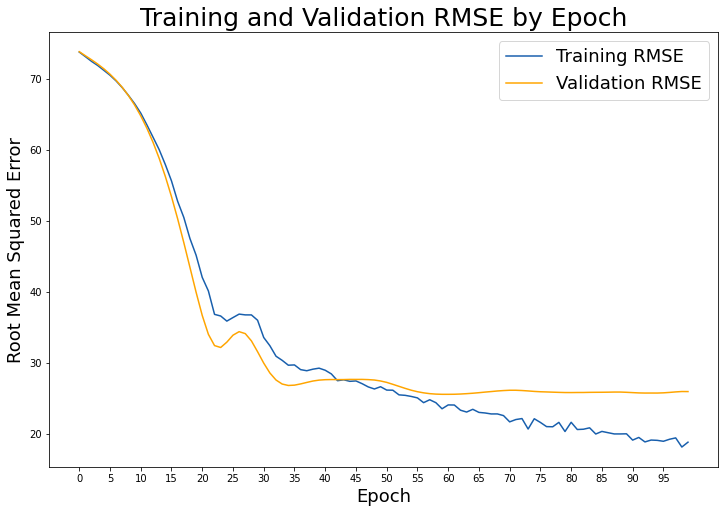

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['root_mean_squared_error']
val_accuracy = history.history['val_root_mean_squared_error']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training RMSE', color='#185fad')
plt.plot(val_accuracy, label='Validation RMSE', color='orange')
# Set title
plt.title('Training and Validation RMSE by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Root Mean Squared Error', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);

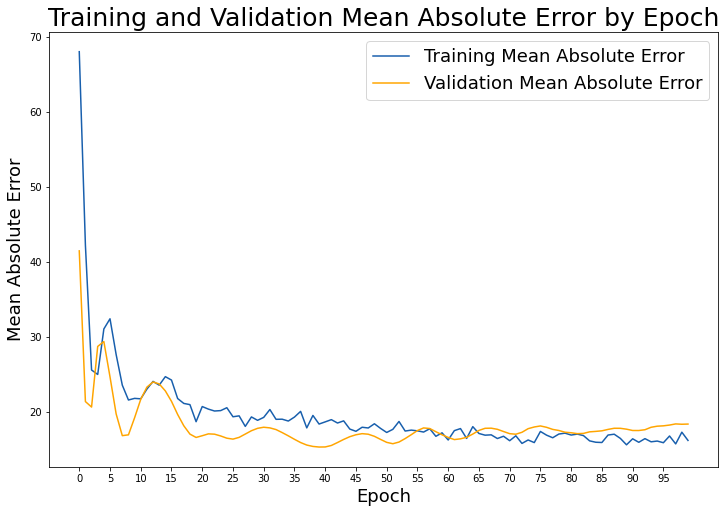

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = AQ.history['mean_absolute_error']
val_accuracy = AQ.history['val_mean_absolute_error']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Mean Absolute Error', color='#185fad')
plt.plot(val_accuracy, label='Validation Mean Absolute Error', color='orange')
# Set title
plt.title('Training and Validation Mean Absolute Error by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Absolute Error', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);

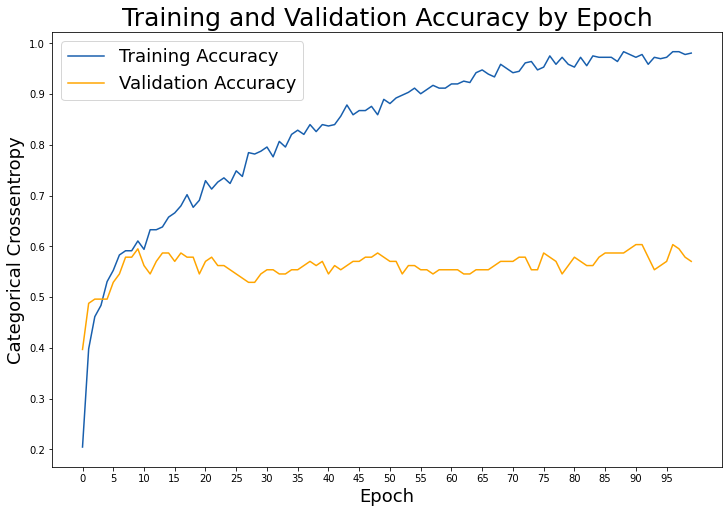

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);

In [ ]:
from keras.models import model_from_json
typemodeljson = typemodel.to_json()
modeljson = model.to_json()
with open("/content/drive/My Drive/Aphasia/typemodel.json", "w") as json_file:
  json_file.write(typemodeljson)
typemodel.save_weights("/content/drive/My Drive/Aphasia/typemodel.h5")
with open("/content/drive/My Drive/Aphasia/model.json", "w") as json_file:
  json_file.write(modeljson)
model.save_weights("/content/drive/My Drive/Aphasia/model.h5")

In [ ]:
from keras.models import model_from_json
modeljson = open('/content/drive/My Drive/Aphasia/model.json', 'r')
typemodeljson = open('/content/drive/My Drive/Aphasia/typemodel.json', 'r')
loaded_modeljson = modeljson.read()
loaded_typemodeljson = typemodeljson.read()
modeljson.close()
typemodeljson.close()
model = model_from_json(loaded_modeljson)
typemodel = model_from_json(loaded_typemodeljson)
model.load_weights("/content/drive/My Drive/Aphasia/model.h5")
typemodel.load_weights("/content/drive/My Drive/Aphasia/typemodel.h5")

In [ ]:
typemodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = typemodel.evaluate(X_test, y_test, verbose = 0)
print("%s: %.2f%%" % (typemodel.metrics_names[1], score[1]*100))

accuracy: 48.41%


In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
score = model.evaluate(X_test_aq, y_test_aq, verbose = 0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

ValueError: ignored